# Cleaning

In [176]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

In [86]:
#df_raw = pd.read_csv('train.csv')
df_raw = pd.read_csv('train.csv', index_col=['date'], parse_dates=['date'])
df_raw.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


## Basic Data Exploration

In [87]:
df_raw.shape

(3000888, 5)

In [88]:
#find the number of unique values in each column 
print('ID unique value count:', len(df_raw['id'].value_counts()))
print('store_nbr unique value count:', len(df_raw['store_nbr'].value_counts()))
print('family unique value count:', len(df_raw['family'].value_counts()))
print('sales unique value count:', len(df_raw['sales'].value_counts()))
print('onpromotion unique value count:', len(df_raw['onpromotion'].value_counts()))

ID unique value count: 3000888
store_nbr unique value count: 54
family unique value count: 33
sales unique value count: 379610
onpromotion unique value count: 362


## drop irrelevent column(s)

In [89]:
df_raw.drop(['id', 'onpromotion'], axis = 1)

,store_nbr,family,sales
date,,,
2013-01-01,1,AUTOMOTIVE,0.000
2013-01-01,1,BABY CARE,0.000
2013-01-01,1,BEAUTY,0.000
2013-01-01,1,BEVERAGES,0.000
2013-01-01,1,BOOKS,0.000
...,...,...,...
2017-08-15,9,POULTRY,438.133
2017-08-15,9,PREPARED FOODS,154.553
2017-08-15,9,PRODUCE,2419.729


## Remove Null Values

In [90]:
df_raw.notnull()
df = df_raw.dropna()
df.shape #There were no null values

(3000888, 5)

## Grouping

### for better visualization, understanding, and use I will be dividing this dataset into multiple groups. I will provide a list of each list and what it contains at the end.

### Creating Categorical Dataframes

In [91]:
#main df
allstores = df

# split by store number
store = list(allstores.groupby('store_nbr'))

### Number of stores: 54
### Number of dept: 33

In [92]:
def total(df):
    answers = df.groupby(df.index, sort=False).sum() 
    sumdf = pd.DataFrame(answers)
    df['total_sales'] = sumdf['sales']
    df = df.loc[(df != 0).any(axis=1)]
    df = df.groupby('date').sum()
    df = df.assign(Time=range(len(df)))
    df = df.drop(['store_nbr', 'onpromotion', 'id'], axis = 1)
    return df

In [93]:
df = pd.DataFrame(store[0][1])

In [94]:
df = total(df)

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_15706/1152446153.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  answers = df.groupby(df.index, sort=False).sum()
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_15706/1152446153.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('date').sum()


In [95]:
df

,sales,total_sales,Time
date,,,
2013-01-01,0.000000,0.000000,0
2013-01-02,7417.148000,244765.884000,1
2013-01-03,5873.244001,193817.052033,2
2013-01-04,5919.879001,195356.007033,3
2013-01-05,6318.785010,208519.905330,4
...,...,...,...
2017-08-11,5403.742021,178323.486693,1679
2017-08-12,7543.623000,248939.559000,1680
2017-08-13,3902.782000,128791.806000,1681


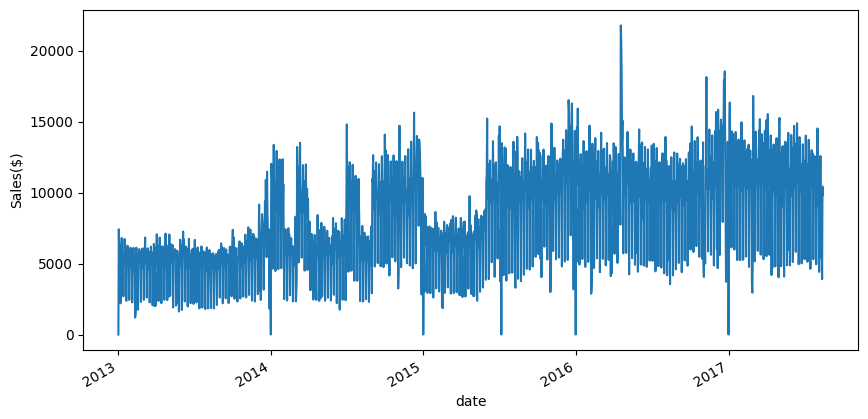

In [60]:
df.total_sales.plot(figsize=(10,5)) 
plt.ylabel("Sales($)")
plt.show()

## -----MODEL------

In [198]:
 def MAPE(Y_actual,Y_Predicted):
        mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
        return mape

# LINEAR REGRESSION

In [224]:
def LR(df): 
    X = df.loc[:, ['Time']]
    y = df.loc[:, 'total_sales'] 
    #Train
    model = LinearRegression()
    model.fit(X, y)
    
    #pred
    y_pred = pd.Series(model.predict(X), index=X.index)
    print(model.score(X,y))

    #plot
    plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,)
    ax = y.plot(**plot_params)
    ax = y_pred.plot(ax=ax, linewidth=3)
    ax.set_title('daily sales');
    

0.3396043757938785


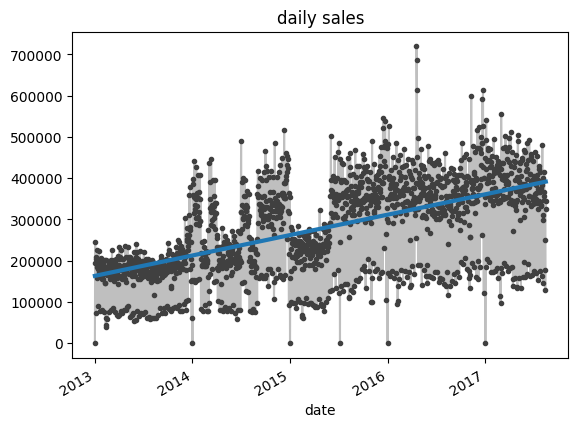

In [225]:
LR(df)

# RANDOM FOREST REGRESSOR

In [222]:
def RFR(df):
    X = df.loc[:, ['Time']]
    y = df.loc[:, 'total_sales'] 
    #Train
    model = RandomForestRegressor()
    model.fit(X, y)
    
    predictions = model.predict(X)
    model.score(X,y)
    
    y_pred = pd.Series(model.predict(X), index=X.index)
    print(model.score(X,y))
 
    #plot
    plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,)
    
    ax = y.plot(**plot_params)
    ax = y_pred.plot(ax=ax, linewidth=1)
    ax.set_title('daily sales');

0.8954151230989956


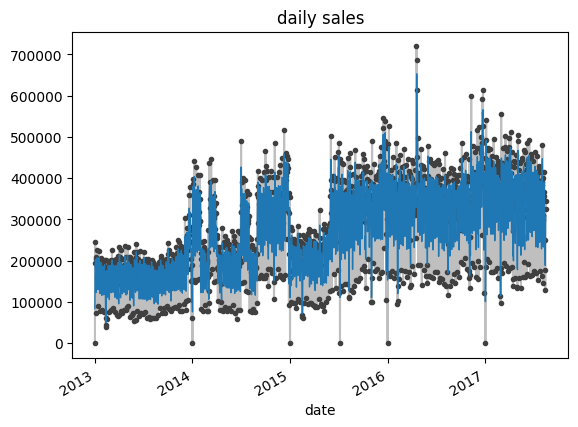

In [223]:
RFR(df)

# NEURAL NETWORK

In [189]:
def NN(df):
    X = df.loc[:, ['Time']]
    y = df.loc[:, 'total_sales'] 
    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=123)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    
    # build the model!
    model = Sequential()
    model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
    model.add(Dense(500, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='linear')) # output node
    model.summary() # see what your model looks like

    # compile the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    # early stopping callback
    es = EarlyStopping(monitor='val_loss',
                       mode='min',
                       patience=50,
                       restore_best_weights = True)

    # fit the model!
    # attach it to a new variable called 'history' in case
    # to look at the learning curves
    history = model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        callbacks=[es],
                        epochs=5000,
                        batch_size=50,
                        verbose=1)
    # let's see the training and validation accuracy by epoch
    history_dict = history.history
    loss_values = history_dict['loss'] # you can change this
    val_loss_values = history_dict['val_loss'] # you can also change this
    epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # scatterplot of actual vs. pred
    # specify the dimensions 
    fig, axes = plt.subplots(1,2) # 1 row, 2 columns

    # this makes the individual subplots
    # Training Results
    axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
    axes[0].set_xlabel("Actual", fontsize=10)
    axes[0].set_ylabel("Predicted",  fontsize=10)
    axes[0].set_title("Training")
    # add 45 deg line
    x = np.linspace(*axes[0].get_xlim())
    axes[0].plot(x, x, color='red')
    # Validation Results
    axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
    axes[1].set_xlabel("Actual", fontsize=10)
    axes[1].set_ylabel("Predicted",  fontsize=10)
    axes[1].set_title("Validation")
    # add 45 deg line
    x = np.linspace(*axes[1].get_xlim())
    axes[1].plot(x, x, color='red')

    # tight layout
    fig.tight_layout()

    # show the plot
    plt.show()

    # metrics
    pred = model.predict(X_test)
    pred

    trainpreds = model.predict(X_train)
    
    LR_MAPE= MAPE(y_test, pred)
    print("MAPE: ",LR_MAPE)
    print("training error: ", mean_absolute_error(y_train, trainpreds)) # train
    print("Testing error: ", mean_absolute_error(y_test, pred)) # test
    
    # Insert the dropout layer
    model = Sequential()
    model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
    model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
    model.add(Dense(1, activation='linear')) # output node
    model.summary() # see what your model looks like

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1000)              2000      
                                                                 
 dense_41 (Dense)            (None, 500)               500500    
                                                                 
 dense_42 (Dense)            (None, 250)               125250    
                                                                 
 dense_43 (Dense)            (None, 1)                 251       
                                                                 
Total params: 628,001
Trainable params: 628,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
27/27 [==============================] - 0s 4ms/step - loss: 88046403584.0000 - mae: 274496.3438 - val_loss: 95663808512.0000 - val_mae: 287365.9062
Epoch 2/5000
27/2

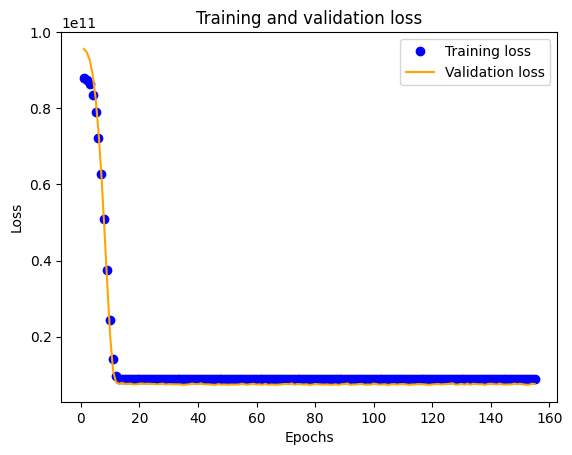

11/11 [==============================] - 0s 1ms/step


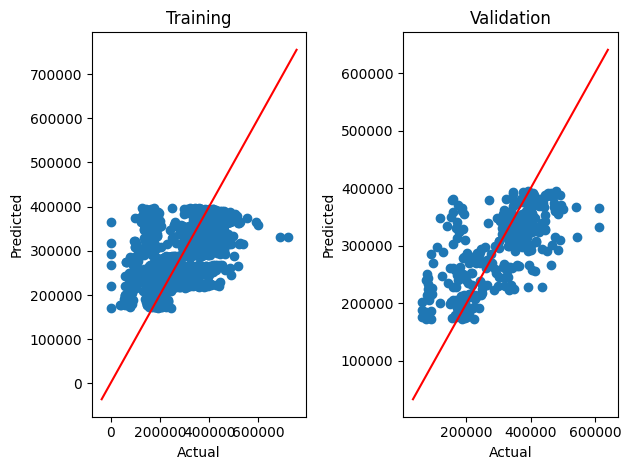

43/43 [==============================] - 0s 739us/step
MAPE:  52.238884910806405
training error:  70040.3729795605
Testing error:  64605.19173086618
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 1000)              2000      
                                                                 
 dropout_12 (Dropout)        (None, 1000)              0         
                                                                 
 dense_45 (Dense)            (None, 500)               500500    
                                                                 
 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_46 (Dense)            (None, 250)               125250    
                                                                 
 dropout_14 (Dropout)        (None, 

In [190]:
NN(df)